# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA and Preprocessing

In [1]:
file_path = 'data.csv'  
data = pd.read_csv(file_path)
data.head()


,Company,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_level,environment_score,social_score,governance_score,total_score,Date,Weekdays,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,Medium,510,316,321,1147,2022-04-19,3,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,Medium,510,303,255,1068,2022-04-17,1,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,Medium,255,385,240,880,2022-04-19,3,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,Medium,570,298,303,1171,2022-04-18,2,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,Medium,492,310,250,1052,2022-04-18,2,BBB,High,1335258


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            722 non-null    object
 1   name               722 non-null    object
 2   currency           722 non-null    object
 3   exchange           722 non-null    object
 4   industry           709 non-null    object
 5   logo               702 non-null    object
 6   weburl             706 non-null    object
 7   environment_grade  722 non-null    object
 8   environment_level  722 non-null    object
 9   social_grade       722 non-null    object
 10  social_level       722 non-null    object
 11  governance_grade   722 non-null    object
 12  governance_level   722 non-null    object
 13  environment_score  722 non-null    int64 
 14  social_score       722 non-null    int64 
 15  governance_score   722 non-null    int64 
 16  total_score        722 non-null    int64 
 1

In [5]:
data.describe()

,environment_score,social_score,governance_score,total_score,Weekdays,cik
count,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02
mean,404.806094,292.182825,278.761773,975.750693,4.199446,9.897925e+05
std,145.103870,57.017406,47.031536,218.751796,2.346916,5.816815e+05
min,200.000000,160.000000,75.000000,600.000000,1.000000,1.800000e+03
25%,240.000000,243.000000,235.000000,763.000000,2.000000,7.231572e+05
50%,483.000000,302.000000,300.000000,1046.000000,3.000000,1.046189e+06
75%,518.750000,322.750000,310.000000,1144.000000,7.000000,1.470094e+06
max,719.000000,667.000000,475.000000,1536.000000,7.000000,1.914023e+06


In [6]:
missing_values = data.isnull().sum()
missing_values

Company               0
name                  0
currency              0
exchange              0
industry             13
logo                 20
weburl               16
environment_grade     0
environment_level     0
social_grade          0
social_level          0
governance_grade      0
governance_level      0
environment_score     0
social_score          0
governance_score      0
total_score           0
Date                  0
Weekdays              0
total_grade           0
total_level           0
cik                   0
dtype: int64

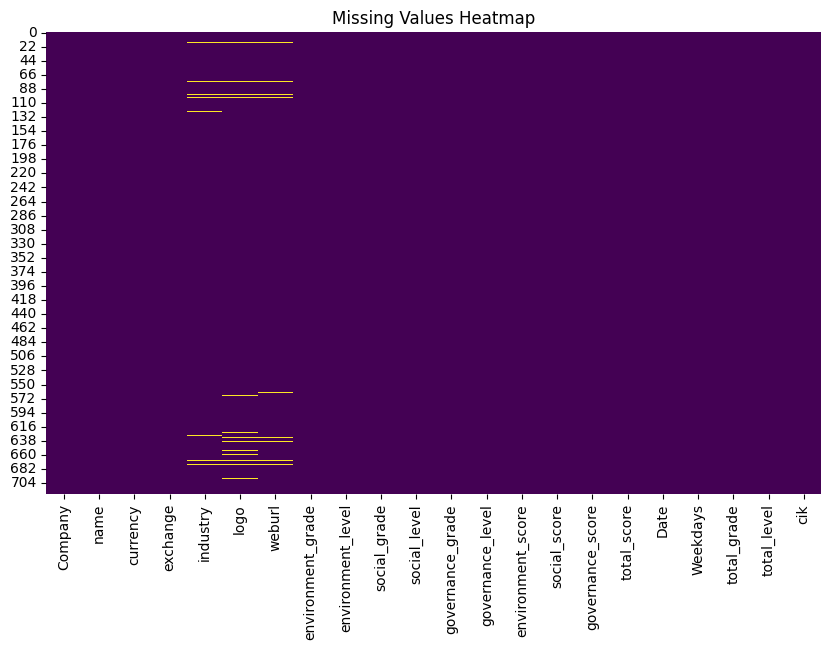

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

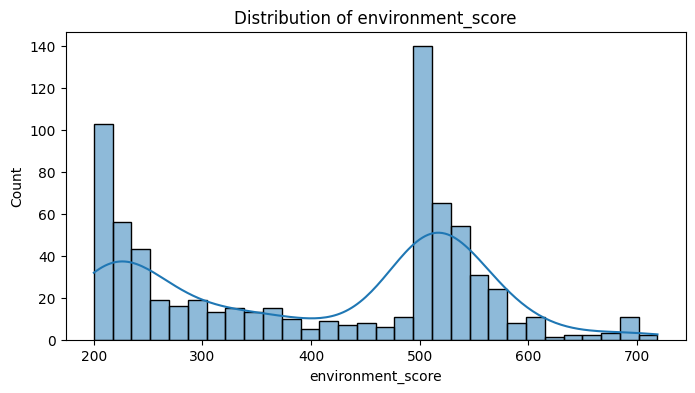

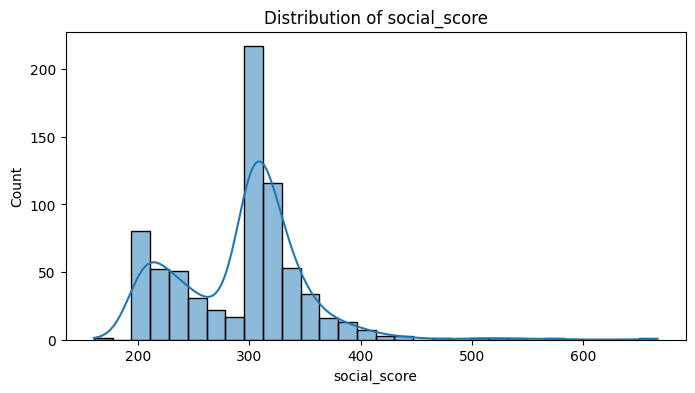

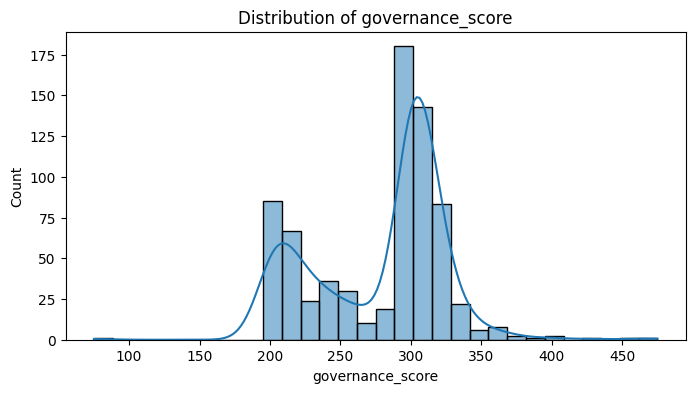

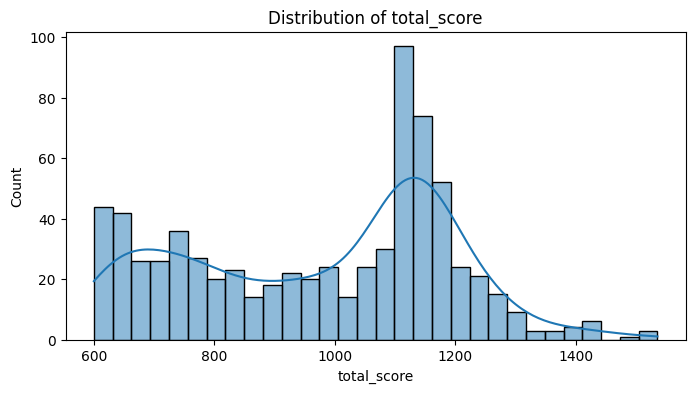

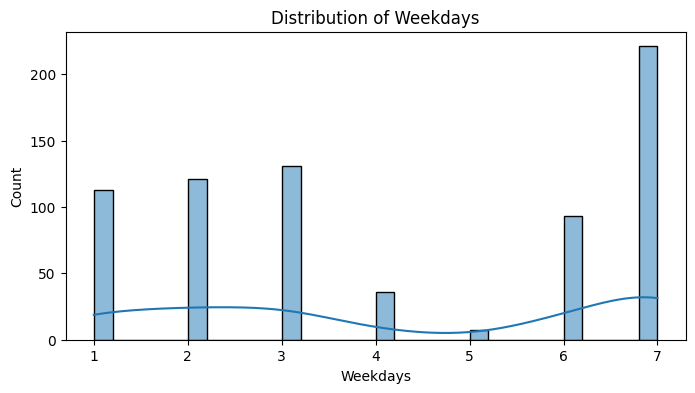

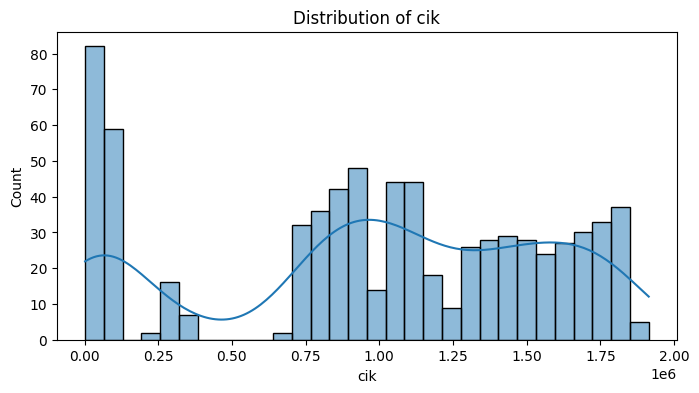

In [8]:
numerical_features = data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

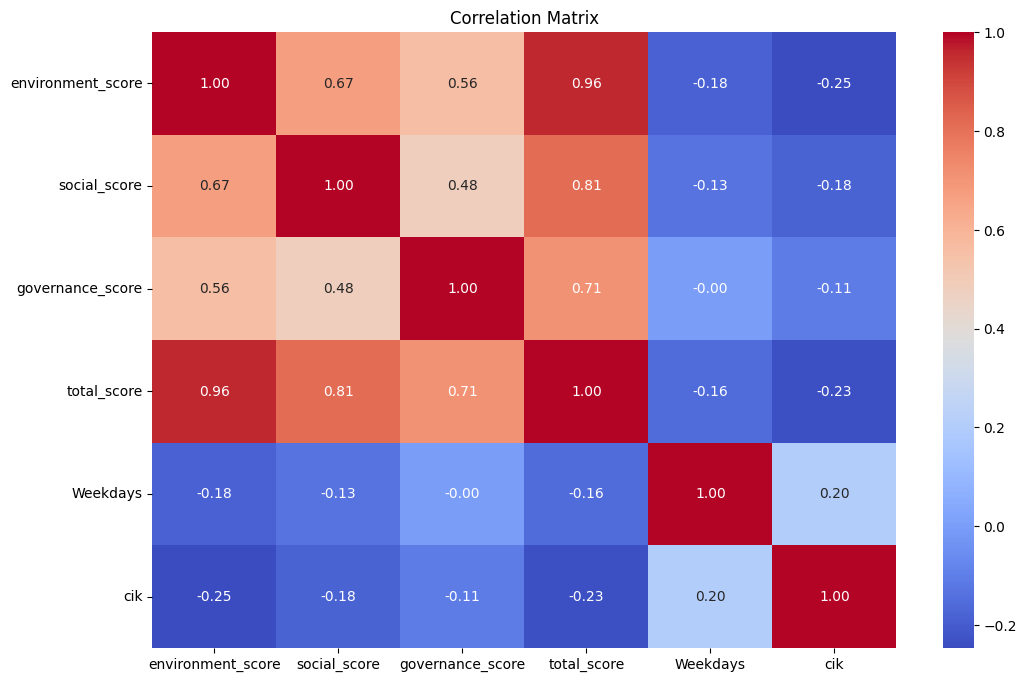

In [10]:
plt.figure(figsize=(12, 8))

numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


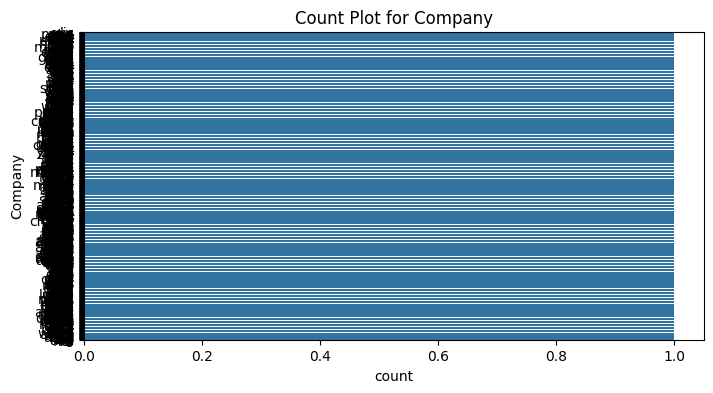

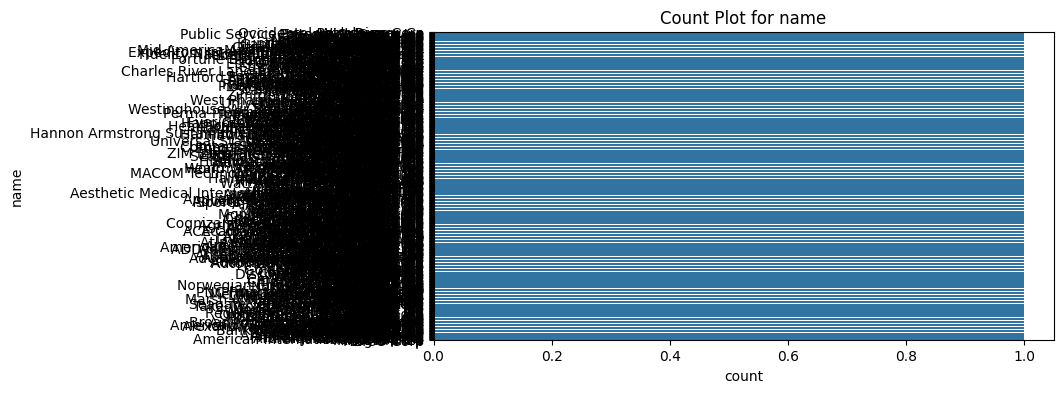

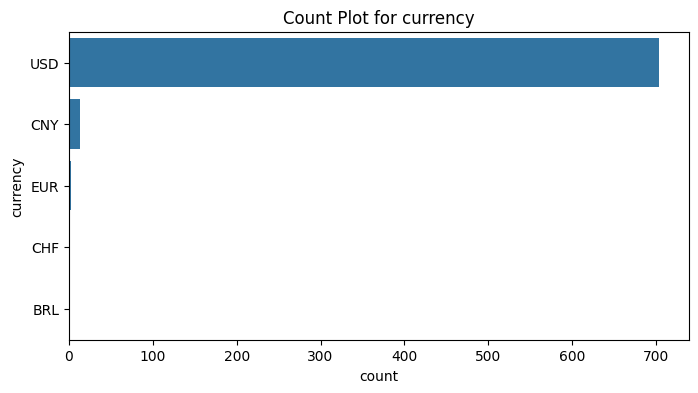

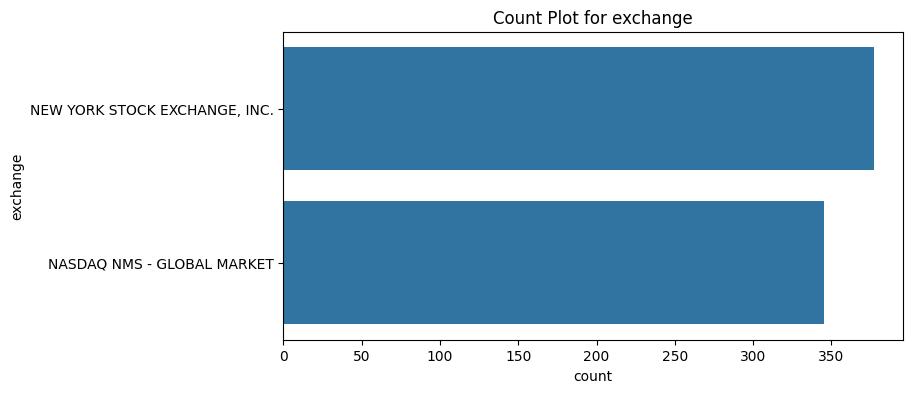

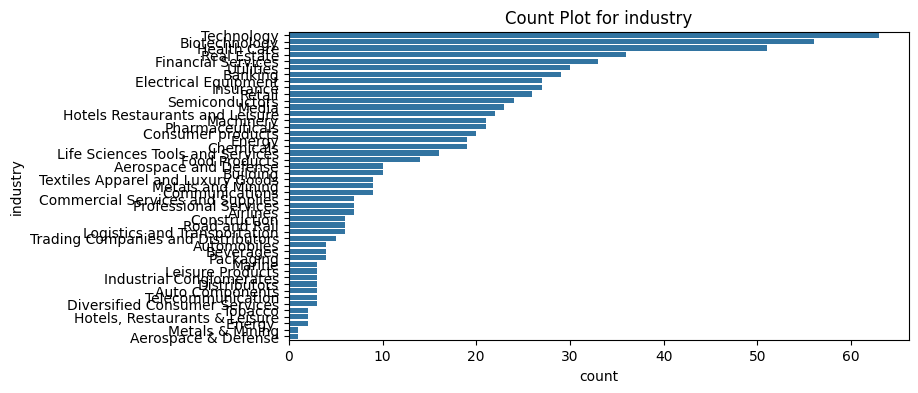

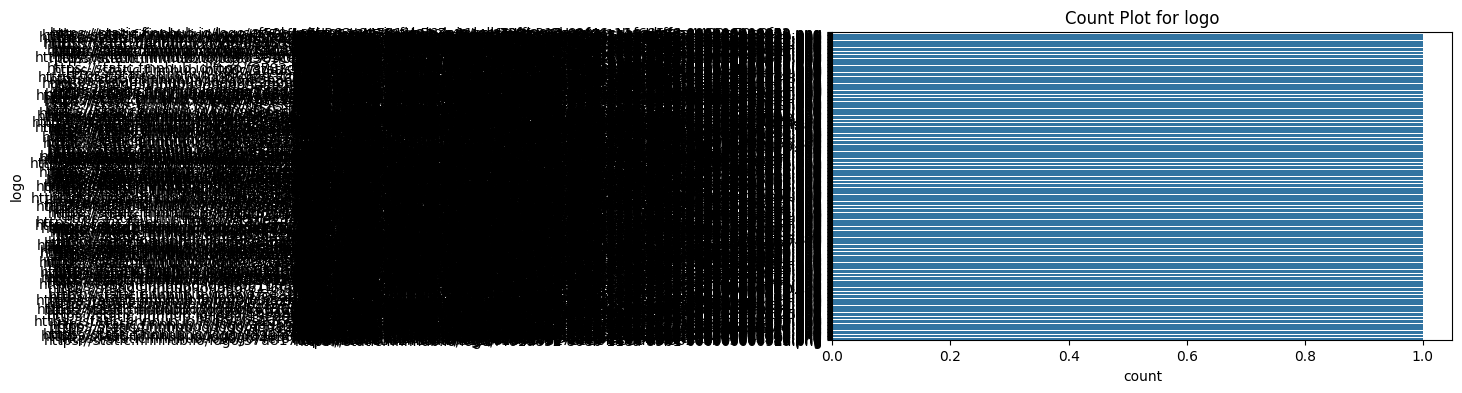

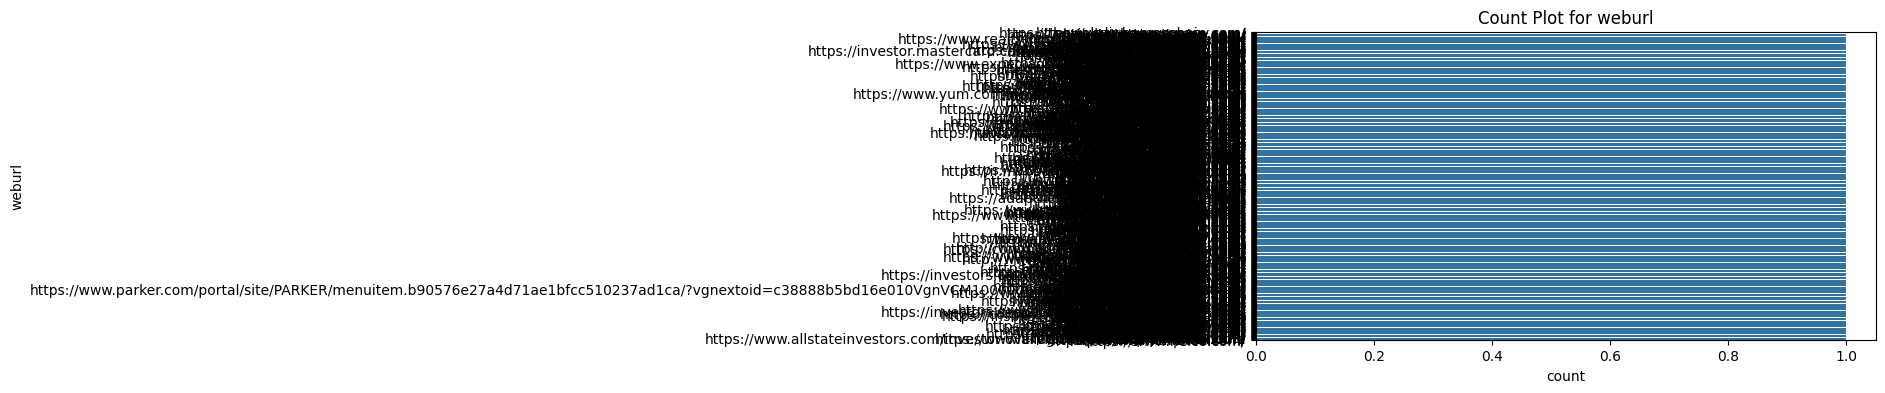

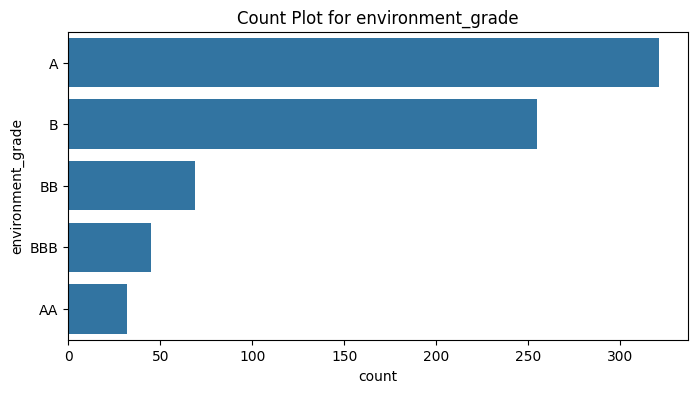

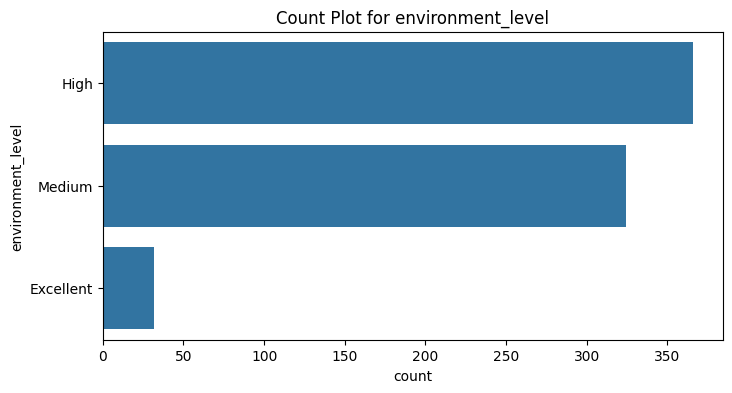

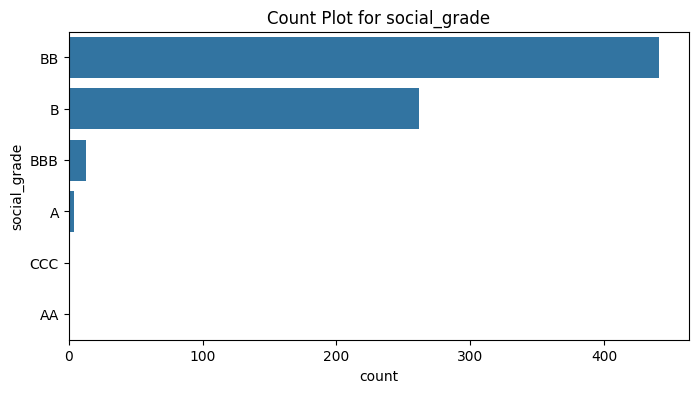

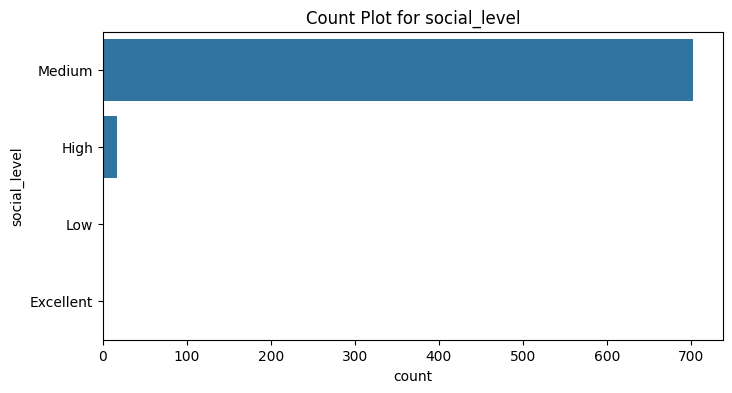

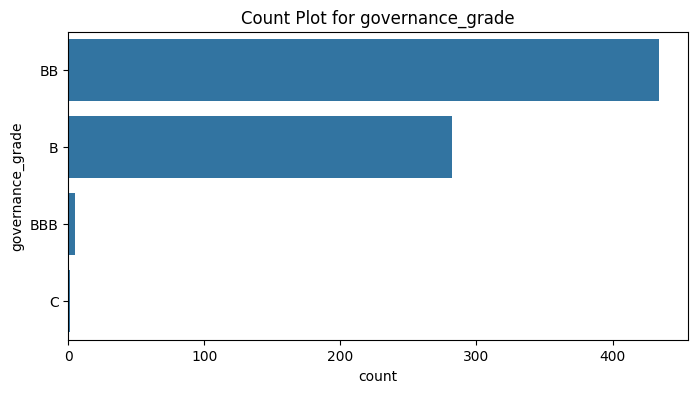

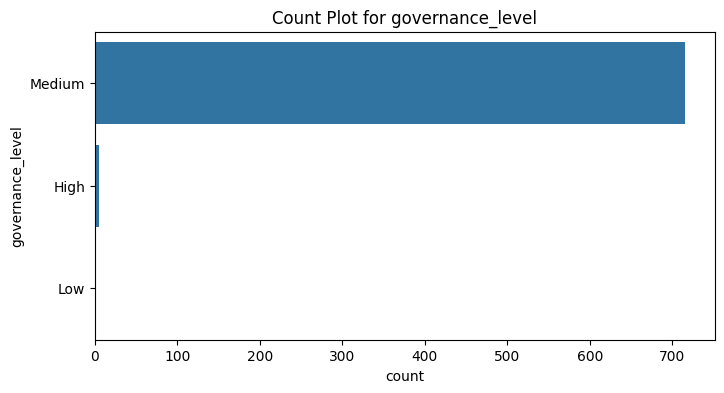

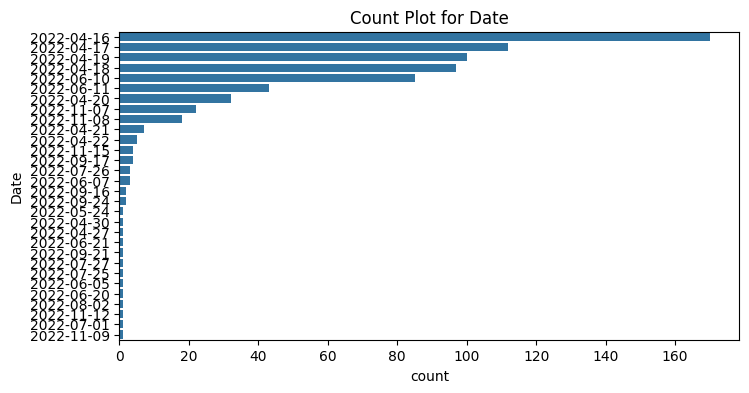

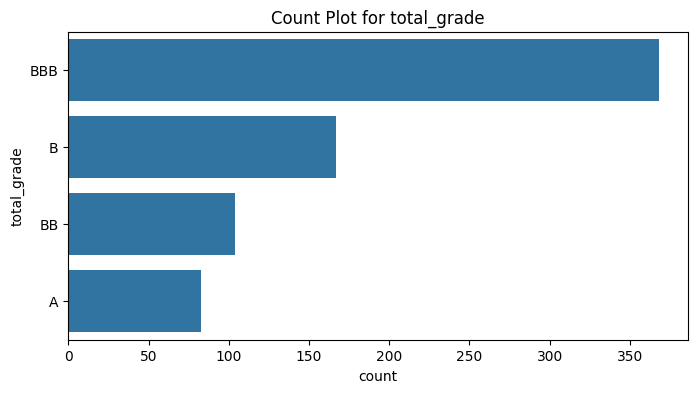

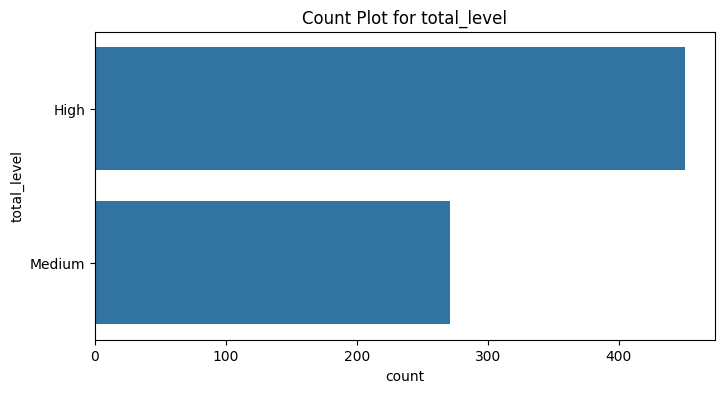

In [11]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, y=feature, order=data[feature].value_counts().index)
    plt.title(f"Count Plot for {feature}")
    plt.show()

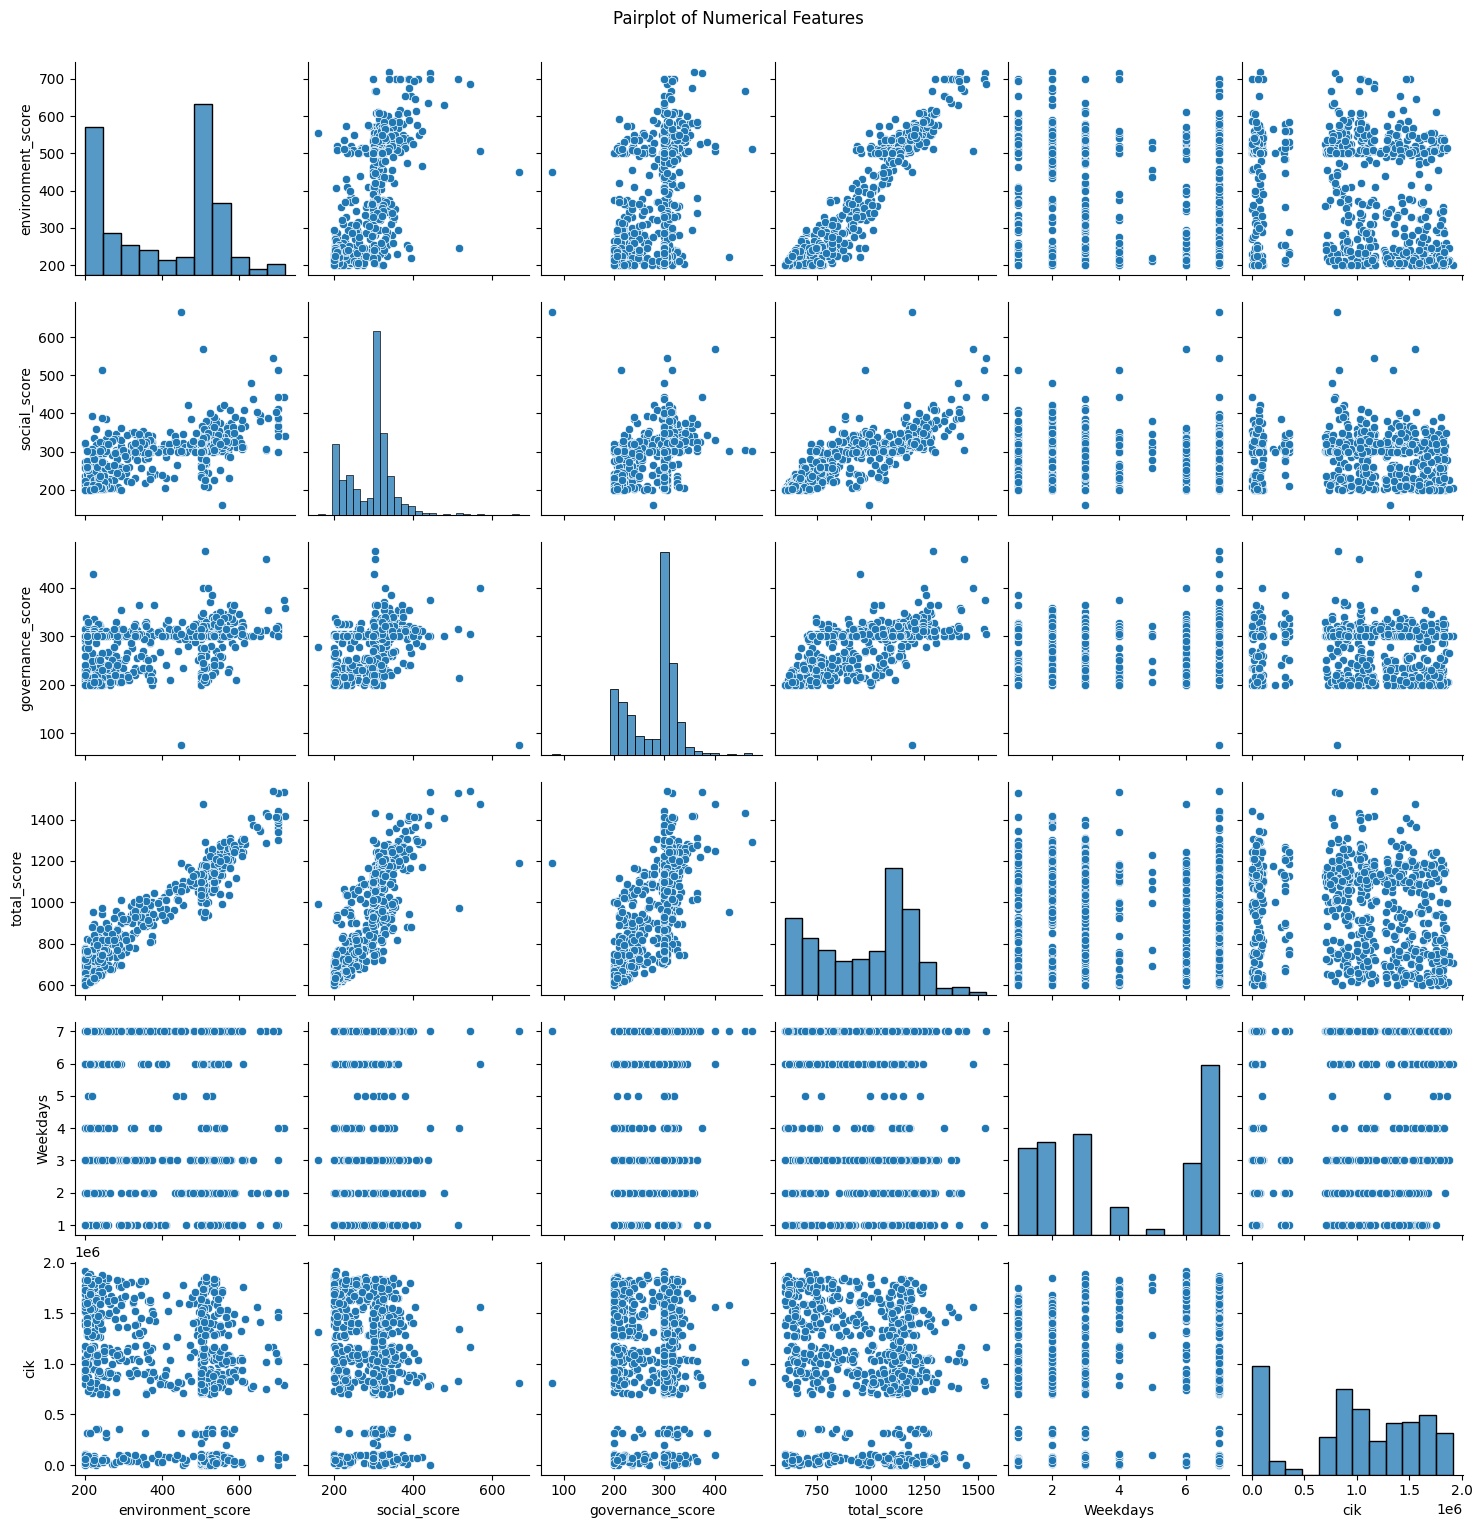

In [12]:

sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()



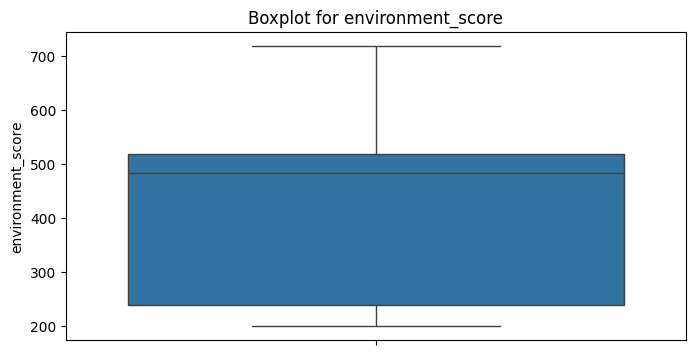

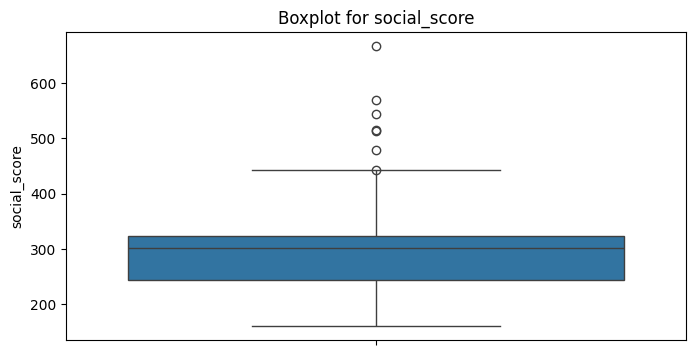

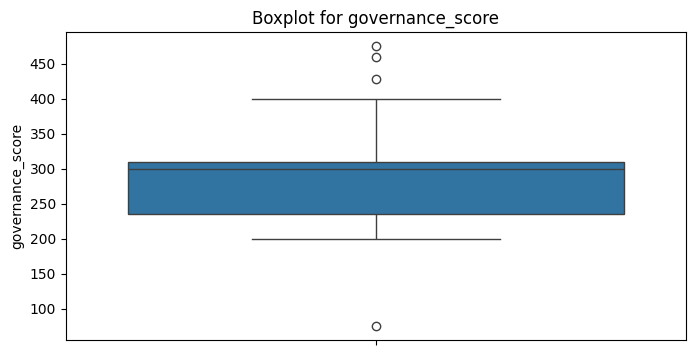

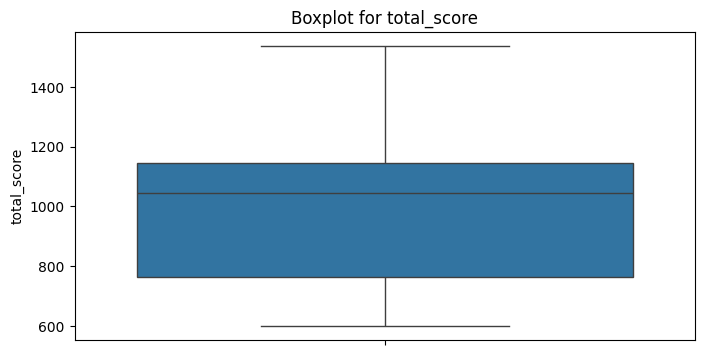

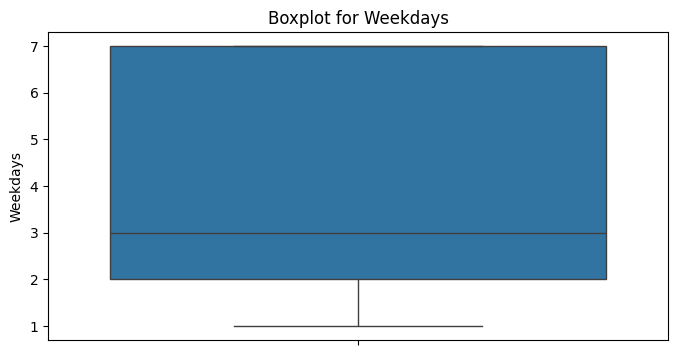

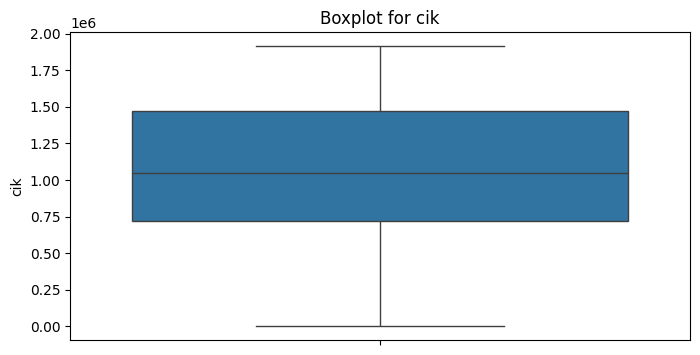

In [13]:

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()



In [15]:

for feature in categorical_features:
    if data[feature].nunique() < 10:  
        grouped_data = data.groupby(feature).mean(numeric_only=True)
        print(f"Mean Values Grouped by {feature}:")
        print(grouped_data)

Mean Values Grouped by currency:
          environment_score  social_score  governance_score  total_score  \
currency                                                                   
BRL              290.000000    203.000000        205.000000   698.000000   
CHF              250.000000    296.000000        305.000000   851.000000   
CNY              225.615385    220.615385        242.692308   688.923077   
EUR              457.666667    296.000000        288.333333  1042.000000   
USD              408.272727    293.609375        279.454545   981.336648   

          Weekdays           cik  
currency                          
BRL       6.000000  1.771007e+06  
CHF       7.000000  1.651625e+06  
CNY       5.846154  1.689232e+06  
EUR       5.000000  1.446511e+06  
USD       4.159091  9.728807e+05  
Mean Values Grouped by exchange:
                               environment_score  social_score  \
exchange                                                         
NASDAQ NMS - GLOBAL MARK

# Data Cleaning

In [2]:
irrelevant_features = ['Company', 'name', 'exchange', 'logo', 'weburl', 'Date', 'Weekdays', 'cik']
cleaned_data = data.drop(columns=irrelevant_features)

cleaned_file_path = 'Cleaned_Data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

remaining_features = cleaned_data.columns.tolist()
cleaned_data_head = cleaned_data.head()


In [3]:
from sklearn.preprocessing import OrdinalEncoder

necessary_features = [
    'environment_grade', 'environment_level', 
    'social_grade', 'social_level', 
    'governance_grade', 'governance_level', 
    'total_grade', 'total_level'
]

for col in necessary_features:
    if cleaned_data[col].dtype == 'object':
        cleaned_data[col] = cleaned_data[col].str.strip().str.lower()

ordinal_mappings = {col: sorted(cleaned_data[col].dropna().unique()) for col in necessary_features}

encoders = {
    col: OrdinalEncoder(categories=[ordinal_mappings[col]], dtype=int)
    for col in necessary_features
}

for col in necessary_features:
    cleaned_data[col] = encoders[col].fit_transform(cleaned_data[[col]])

In [4]:
unique_counts_per_class = {col: cleaned_data[col].value_counts().to_dict() for col in necessary_features}

unique_counts_df = pd.DataFrame.from_dict(unique_counts_per_class, orient='index').transpose()


In [5]:
unique_counts_df.head()

,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,total_grade,total_level
0,321.0,32.0,4.0,1.0,282.0,5.0,83.0,451.0
2,255.0,324.0,262.0,1.0,5.0,716.0,104.0,NaN
3,69.0,NaN,441.0,703.0,1.0,NaN,368.0,NaN
4,45.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
1,32.0,366.0,1.0,17.0,434.0,1.0,167.0,271.0


In [6]:
cleaned_data.head()

,currency,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,total_grade,total_level
0,USD,Media,0,1,3,3,1,2,510,316,321,1147,3,0
1,USD,Automobiles,0,1,3,3,0,2,510,303,255,1068,3,0
2,USD,Trading Companies and Distributors,2,2,3,3,0,2,255,385,240,880,2,1
3,USD,Consumer products,0,1,2,3,1,2,570,298,303,1171,3,0
4,USD,Media,4,1,3,3,0,2,492,310,250,1052,3,0


In [7]:
unique_industries = cleaned_data['industry'].nunique()
unique_currencies = cleaned_data['currency'].nunique()

industry_counts = cleaned_data['industry'].value_counts()
currency_counts = cleaned_data['currency'].value_counts()

summary = {
    "Unique Industries": unique_industries,
    "Unique Currencies": unique_currencies,
    "Industry Counts": industry_counts.to_dict(),
    "Currency Counts": currency_counts.to_dict()
}


In [8]:
summary

{'Unique Industries': 47,
 'Unique Currencies': 5,
 'Industry Counts': {'Technology': 63,
  'Biotechnology': 56,
  'Health Care': 51,
  'Real Estate': 36,
  'Financial Services': 33,
  'Utilities': 30,
  'Banking': 29,
  'Electrical Equipment': 27,
  'Insurance': 27,
  'Retail': 26,
  'Semiconductors': 24,
  'Media': 23,
  'Hotels Restaurants and Leisure': 22,
  'Machinery': 21,
  'Pharmaceuticals': 21,
  'Consumer products': 20,
  'Energy': 19,
  'Chemicals': 19,
  'Life Sciences Tools and Services': 16,
  'Food Products': 14,
  'Aerospace and Defense': 10,
  'Building': 10,
  'Textiles Apparel and Luxury Goods': 9,
  'Metals and Mining': 9,
  'Communications': 9,
  'Commercial Services and Supplies': 7,
  'Professional Services': 7,
  'Airlines': 7,
  'Construction': 6,
  'Road and Rail': 6,
  'Logistics and Transportation': 6,
  'Trading Companies and Distributors': 5,
  'Automobiles': 4,
  'Beverages': 4,
  'Packaging': 4,
  'Marine': 3,
  'Leisure Products': 3,
  'Industrial Congl

In [9]:
cleaned_data.loc[cleaned_data['industry'].isnull(), 'industry'] = "Blank Check Companies"

updated_missing_industry_data = cleaned_data[cleaned_data['industry'] == "Blank Check Companies"]



In [10]:
updated_missing_industry_data.head()

,currency,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,total_grade,total_level
15,USD,Blank Check Companies,2,2,2,3,0,2,205,200,200,605,1,1
27,USD,Blank Check Companies,2,2,2,3,1,2,200,205,300,705,1,1
32,USD,Blank Check Companies,2,2,2,3,0,2,225,211,215,651,1,1
57,USD,Blank Check Companies,2,2,3,3,1,2,215,301,300,816,2,1
76,USD,Blank Check Companies,2,2,2,3,0,2,200,200,200,600,1,1


In [11]:
industry_encoder = OrdinalEncoder(dtype=int)
cleaned_data['industry'] = industry_encoder.fit_transform(cleaned_data[['industry']])

cleaned_data = cleaned_data.drop(columns=['currency'])


In [16]:
import joblib
joblib.dump(industry_encoder, 'industry_encoder.pkl')

['industry_encoder.pkl']

In [17]:
for col in necessary_features:
    joblib.dump(encoders[col], f'{col}_encoder.pkl')

In [18]:
cleaned_data.head()

,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,total_grade,total_level
0,32,0,1,3,3,1,2,510,316,321,1147,3,0
1,4,0,1,3,3,0,2,510,303,255,1068,3,0
2,46,2,2,3,3,0,2,255,385,240,880,2,1
3,14,0,1,2,3,1,2,570,298,303,1171,3,0
4,32,4,1,3,3,0,2,492,310,250,1052,3,0


In [19]:
industry_mapping = {index: category for index, category in enumerate(industry_encoder.categories_[0])}

cleaned_data['industry_name'] = cleaned_data['industry'].map(industry_mapping)


In [20]:
cleaned_data.head()

,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,total_grade,total_level,industry_name
0,32,0,1,3,3,1,2,510,316,321,1147,3,0,Media
1,4,0,1,3,3,0,2,510,303,255,1068,3,0,Automobiles
2,46,2,2,3,3,0,2,255,385,240,880,2,1,Trading Companies and Distributors
3,14,0,1,2,3,1,2,570,298,303,1171,3,0,Consumer products
4,32,4,1,3,3,0,2,492,310,250,1052,3,0,Media


In [21]:
industry_mapping = {
    "Energy ": "Energy",
    "Metals & Mining": "Metals and Mining",
    "Aerospace & Defense": "Aerospace and Defense"
}

cleaned_data['industry_name'] = cleaned_data['industry_name'].replace(industry_mapping)

unique_industries = cleaned_data['industry_name'].unique()


In [22]:
len(unique_industries)

45

In [23]:
unique_industries

array(['Media', 'Automobiles', 'Trading Companies and Distributors',
       'Consumer products', 'Hotels Restaurants and Leisure',
       'Diversified Consumer Services', 'Airlines', 'Insurance',
       'Communications', 'Building', 'Technology', 'Electrical Equipment',
       'Logistics and Transportation', 'Blank Check Companies',
       'Biotechnology', 'Health Care', 'Life Sciences Tools and Services',
       'Banking', 'Semiconductors', 'Pharmaceuticals',
       'Financial Services', 'Commercial Services and Supplies',
       'Chemicals', 'Real Estate', 'Utilities', 'Machinery',
       'Food Products', 'Retail', 'Energy', 'Road and Rail',
       'Distributors', 'Beverages', 'Telecommunication',
       'Professional Services', 'Auto Components', 'Packaging',
       'Aerospace and Defense', 'Tobacco', 'Metals and Mining',
       'Construction', 'Textiles Apparel and Luxury Goods',
       'Industrial Conglomerates', 'Leisure Products', 'Marine',
       'Hotels, Restaurants & Leisure'

In [24]:
industry_encoder = OrdinalEncoder(dtype=int)
cleaned_data['industry'] = industry_encoder.fit_transform(cleaned_data[['industry_name']])

In [25]:
len(cleaned_data['industry'].unique())

45

In [26]:
cleaned_data = cleaned_data.drop(columns=['industry_name'])

In [27]:
cleaned_data.to_csv('Encoded_Data.csv', index=False)

# Feature Engineering and Creating Target (Buy Signal)

In [28]:
INDUSTRY_WEIGHTS = {
    # High environmental impact industries
    'Energy': {'environment': 0.5, 'social': 0.25, 'governance': 0.25},
    'Utilities': {'environment': 0.5, 'social': 0.25, 'governance': 0.25},
    'Chemicals': {'environment': 0.45, 'social': 0.3, 'governance': 0.25},
    'Metals and Mining': {'environment': 0.45, 'social': 0.3, 'governance': 0.25},
    
    # Technology and innovation focused
    'Technology': {'environment': 0.25, 'social': 0.4, 'governance': 0.35},
    'Semiconductors': {'environment': 0.3, 'social': 0.35, 'governance': 0.35},
    'Communications': {'environment': 0.2, 'social': 0.45, 'governance': 0.35},
    'Telecommunication': {'environment': 0.2, 'social': 0.45, 'governance': 0.35},
    
    # Healthcare and life sciences
    'Biotechnology': {'environment': 0.25, 'social': 0.45, 'governance': 0.3},
    'Health Care': {'environment': 0.25, 'social': 0.45, 'governance': 0.3},
    'Pharmaceuticals': {'environment': 0.3, 'social': 0.4, 'governance': 0.3},
    'Life Sciences Tools and Services': {'environment': 0.25, 'social': 0.45, 'governance': 0.3},
    
    # Financial sector
    'Financial Services': {'environment': 0.2, 'social': 0.35, 'governance': 0.45},
    'Banking': {'environment': 0.2, 'social': 0.35, 'governance': 0.45},
    'Insurance': {'environment': 0.2, 'social': 0.35, 'governance': 0.45},
    
    # Consumer-facing industries
    'Retail': {'environment': 0.3, 'social': 0.4, 'governance': 0.3},
    'Consumer products': {'environment': 0.35, 'social': 0.4, 'governance': 0.25},
    'Food Products': {'environment': 0.4, 'social': 0.35, 'governance': 0.25},
    'Beverages': {'environment': 0.4, 'social': 0.35, 'governance': 0.25},
    
    # Manufacturing and industrial
    'Electrical Equipment': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Machinery': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Aerospace and Defense': {'environment': 0.35, 'social': 0.3, 'governance': 0.35},
    'Auto Components': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Automobiles': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    
    # Service-based industries
    'Media': {'environment': 0.2, 'social': 0.45, 'governance': 0.35},
    'Professional Services': {'environment': 0.2, 'social': 0.45, 'governance': 0.35},
    'Commercial Services and Supplies': {'environment': 0.25, 'social': 0.4, 'governance': 0.35},
    
    # Real estate and construction
    'Real Estate': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Building': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Construction': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    
    # Transportation
    'Airlines': {'environment': 0.45, 'social': 0.3, 'governance': 0.25},
    'Marine': {'environment': 0.45, 'social': 0.3, 'governance': 0.25},
    'Road and Rail': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    'Logistics and Transportation': {'environment': 0.4, 'social': 0.3, 'governance': 0.3},
    
    # Default weights for other industries
    'Blank Check Companies': {'environment': 0.33, 'social': 0.33, 'governance': 0.34}
}

In [29]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [30]:
def get_industry_weights(industry):
    return INDUSTRY_WEIGHTS.get(industry, INDUSTRY_WEIGHTS['Blank Check Companies'])

def calculate_weighted_score(row):
    weights = get_industry_weights(row['industry'])
    
    env_score = row['environment_score'] * weights['environment']
    social_score = row['social_score'] * weights['social']
    gov_score = row['governance_score'] * weights['governance']

    env_score *= (1 + row['environment_grade'] * 0.1)
    social_score *= (1 + row['social_grade'] * 0.1)
    gov_score *= (1 + row['governance_grade'] * 0.1)
    
    return env_score + social_score + gov_score


def preprocess_data(df):
    """Preprocess data with industry-specific considerations"""
    processed_df = df.copy()
    
    processed_df['industry'] = processed_df['industry'].fillna('Blank Check Companies')
    
    processed_df['weighted_score'] = processed_df.apply(
        lambda row: calculate_weighted_score(row), axis=1
    )
    
    score_scaler = StandardScaler()
    
    for col in ['environment_score', 'social_score', 'governance_score']:
        processed_df[f'{col}_norm'] = score_scaler.fit_transform(processed_df[[col]])
        joblib.dump(score_scaler, f'{col}_scaler.pkl')
    
    industry_dummies = pd.get_dummies(processed_df['industry'], prefix='industry')
    processed_df = pd.concat([processed_df, industry_dummies], axis=1)
    
    processed_df['env_social_interaction'] = processed_df['environment_score_norm'] * processed_df['social_score_norm']
    processed_df['env_gov_interaction'] = processed_df['environment_score_norm'] * processed_df['governance_score_norm']
    processed_df['social_gov_interaction'] = processed_df['social_score_norm'] * processed_df['governance_score_norm']
    
    return processed_df

def create_buy_signal(df, percentile_threshold=75):
    """Create buy signal based on weighted scores and industry-specific thresholds"""
    df_with_signal = df.copy()
    
    industry_thresholds = df_with_signal.groupby('industry')['weighted_score'].transform(
        lambda x: np.percentile(x, percentile_threshold)
    )
    
    df_with_signal['buy_signal'] = (df_with_signal['weighted_score'] >= industry_thresholds).astype(int)
    
    return df_with_signal



In [31]:
raw_data = pd.read_csv('Encoded_Data.csv')

In [32]:
processed_data = preprocess_data(raw_data)

In [108]:
processed_data.head()

,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,...,industry_38,industry_39,industry_40,industry_41,industry_42,industry_43,industry_44,env_social_interaction,env_gov_interaction,social_gov_interaction
0,30,3,1,3,3,1,2,510,316,321,...,False,False,False,False,False,False,False,0.303247,0.651974,0.375665
1,3,3,1,3,3,0,2,510,303,255,...,False,False,False,False,False,False,False,0.137727,-0.366778,-0.095984
2,43,0,2,3,3,0,2,255,385,240,...,False,False,False,False,False,True,False,-1.682958,0.852054,-1.343499
3,13,3,1,2,3,1,2,570,298,303,...,False,False,False,False,False,False,False,0.116311,0.587528,0.052652
4,30,2,1,3,3,0,2,492,310,250,...,False,False,False,False,False,False,False,0.188036,-0.367990,-0.191364


In [109]:
final_data = create_buy_signal(processed_data)

In [110]:
final_data.head()

,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,...,industry_39,industry_40,industry_41,industry_42,industry_43,industry_44,env_social_interaction,env_gov_interaction,social_gov_interaction,buy_signal
0,30,3,1,3,3,1,2,510,316,321,...,False,False,False,False,False,False,0.303247,0.651974,0.375665,1
1,3,3,1,3,3,0,2,510,303,255,...,False,False,False,False,False,False,0.137727,-0.366778,-0.095984,1
2,43,0,2,3,3,0,2,255,385,240,...,False,False,False,False,True,False,-1.682958,0.852054,-1.343499,0
3,13,3,1,2,3,1,2,570,298,303,...,False,False,False,False,False,False,0.116311,0.587528,0.052652,1
4,30,2,1,3,3,0,2,492,310,250,...,False,False,False,False,False,False,0.188036,-0.367990,-0.191364,0


In [111]:
feature_cols = [col for col in final_data.columns if col.endswith('_norm') or col == 'industry' or col.endswith('_interaction') or col == 'weighted_score' or col == 'buy_signal']

In [112]:
tdf = final_data[feature_cols]

In [113]:
tdf.head()

,industry,weighted_score,environment_score_norm,social_score_norm,governance_score_norm,env_social_interaction,env_gov_interaction,social_gov_interaction,buy_signal
0,30,474.408,0.725458,0.418007,0.898706,0.303247,0.651974,0.375665,1
1,3,435.477,0.725458,0.189849,-0.505581,0.137727,-0.366778,-0.095984,1
2,43,330.915,-1.033122,1.629003,-0.824737,-1.682958,0.852054,-1.343499,0
3,13,475.860,1.139242,0.102095,0.515718,0.116311,0.587528,0.052652,1
4,30,412.822,0.601323,0.312703,-0.611966,0.188036,-0.367990,-0.191364,0


In [86]:
tdf['buy_signal'].value_counts()

buy_signal
0    525
1    197
Name: count, dtype: int64

In [114]:
tdf.to_csv('Final_Data.csv', index=False)

In [88]:
odf = pd.read_csv('Encoded_Data.csv')

In [89]:
od_fetaures = ['total_score','total_grade', 'total_level']

In [90]:
odf = odf[od_fetaures]

In [97]:
tdf[od_fetaures] = odf[od_fetaures]

/var/folders/l_/jb67fzfs7fsbr49l_t_mgn_m0000gn/T/ipykernel_23127/2742149475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf[od_fetaures] = odf[od_fetaures]


In [115]:
scaler = StandardScaler()
original_features = ['weighted_score']
tdf[original_features] = scaler.fit_transform(tdf[original_features])

/var/folders/l_/jb67fzfs7fsbr49l_t_mgn_m0000gn/T/ipykernel_23127/3158266233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf[original_features] = scaler.fit_transform(tdf[original_features])


In [116]:
tdf.head()

,industry,weighted_score,environment_score_norm,social_score_norm,governance_score_norm,env_social_interaction,env_gov_interaction,social_gov_interaction,buy_signal
0,30,0.804388,0.725458,0.418007,0.898706,0.303247,0.651974,0.375665,1
1,3,0.445129,0.725458,0.189849,-0.505581,0.137727,-0.366778,-0.095984,1
2,43,-0.519778,-1.033122,1.629003,-0.824737,-1.682958,0.852054,-1.343499,0
3,13,0.817787,1.139242,0.102095,0.515718,0.116311,0.587528,0.052652,1
4,30,0.236067,0.601323,0.312703,-0.611966,0.188036,-0.367990,-0.191364,0


In [117]:
tdf.to_csv('Final_Data.csv', index=False)

In [33]:
tdf = pd.read_csv('Final_Data.csv')

In [34]:
tttt= pd.read_csv('Encoded_Data.csv')

In [35]:
f = ['environment_grade','environment_level','social_grade','social_level','governance_grade','governance_level', 'total_grade','total_level']

In [36]:
tdf[f] = tttt[f]

In [37]:
tdf.head()

,industry,weighted_score,environment_score_norm,social_score_norm,governance_score_norm,env_social_interaction,env_gov_interaction,social_gov_interaction,buy_signal,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,total_grade,total_level
0,30,0.804388,0.725458,0.418007,0.898706,0.303247,0.651974,0.375665,1,0,1,3,3,1,2,3,0
1,3,0.445129,0.725458,0.189849,-0.505581,0.137727,-0.366778,-0.095984,1,0,1,3,3,0,2,3,0
2,43,-0.519778,-1.033122,1.629003,-0.824737,-1.682958,0.852054,-1.343499,0,2,2,3,3,0,2,2,1
3,13,0.817787,1.139242,0.102095,0.515718,0.116311,0.587528,0.052652,1,0,1,2,3,1,2,3,0
4,30,0.236067,0.601323,0.312703,-0.611966,0.188036,-0.367990,-0.191364,0,4,1,3,3,0,2,3,0


In [38]:
tdf.to_csv('Final_Data.csv', index=False)

# Handling class imbalance (SMOTE)

In [123]:

from imblearn.over_sampling import SMOTE

import pandas as pd

def normalize_and_apply_smote(df):
    
    X = df.drop(columns=['buy_signal'])
    y = df['buy_signal']
    
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled_df = pd.DataFrame(y_resampled, columns=['buy_signal'])
    
    balanced_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)
    return balanced_data

balanced_dataset = normalize_and_apply_smote(tdf)

balanced_dataset.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved to 'balanced_dataset.csv'")


Balanced dataset saved to 'balanced_dataset.csv'


In [124]:
balanced_dataset['buy_signal'].value_counts()

buy_signal
1    525
0    525
Name: count, dtype: int64